# Imports

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from tqdm import tqdm

## Configuração

Personalize as configurações abaixo de acordo com o seu ambiente e datasets

In [2]:
# Informe o diretório onde estão os arquivos XLSX que contêm os datasets e catalog:

dataset_path = '../data/Dados DNC - Clientes, Ordens e Produtos_2.xlsx'
catalog_path = '../data/Data Catolog - Bases DNC_2.xlsx'
dataset_ordens_path = '../data/2023_03_03 - Ordens DNC.xlsx'

# Informe o nome das planilhas do dataset e catalog:

datasets = {
  'clientes': 'Reporting - Dados Perfil de Cli',
  'ordens': 'Reporting - Dados Ordens - Reco',
  'produtos': 'Reporting - Dados Produtos - Re'
}

catalog = {
    'clientes': 'Perfil de Clients',
    'ordens': 'Ordens ',
    'produtos': 'Produtos',
}

In [10]:
# Informe os tipos de dados e seus equivalentes no Python para realizar a conversão automática dos tipos de dados de cada campo

datatypes = {
  'STRING': 'object',
  'NUMERIC': 'float64',
  'INTEGER': 'int64',
  'BYTES': 'object',
  'DATE': 'datetime64[ns]',
}

### Executar importação

In [11]:
df_produtos = pd.read_excel('../data/Dados DNC - Clientes, Ordens e Produtos_2.xlsx', sheet_name=None)
dfs = {}
for index, key in enumerate(datasets):
  dfs[key] = df_produtos.get(datasets[key])

In [12]:
df_produto = dfs['produtos'].copy()
df_produto

,Symbol,Product,Product_N1,Product_N2,Product_N3,Sector,Industry,Group
0,YI,13.93,Variable Income,Stocks and ETF's,Stocks,RetailTrade,DrugstoreChains,Services
1,IRBO,iShares Robotics and Artificial Intel Mltsctr...,Variable Income,Stocks and ETF's,ETF's,Miscellaneous,InvestmentTrustsOrMutualFunds,NaN
2,XM,Qualtrics International Inc.,Variable Income,Stocks and ETF's,Stocks,TechnologyServices,PackagedSoftware,Technology
3,STIP,0-5 Year TIPS Bond iShares,Variable Income,Stocks and ETF's,ETF's,Miscellaneous,InvestmentTrustsOrMutualFunds,NaN
4,VCVC,10X Capital Venture Acquisition Corp - Class A,Variable Income,Stocks and ETF's,Stocks,Finance,FinancialConglomerates,Financial
...,...,...,...,...,...,...,...,...
8762,ZWRKU,Z-Work Acquisition Corp - Units (1 Ord Class A...,Variable Income,Stocks and ETF's,Stocks,Finance,FinancialConglomerates,Financial
8763,ZY,Zymergen Inc.,Variable Income,Stocks and ETF's,Stocks,Unknown,Unknown,NaN
8764,ZYME,Zymeworks Inc,Variable Income,Stocks and ETF's,Stocks,HealthTechnology,Biotechnology,Healthcare
8765,ZYNE,"Zynerba Pharmaceuticals, Inc.",Variable Income,Stocks and ETF's,Stocks,HealthTechnology,PharmaceuticalsOther,Healthcare


In [13]:
df_dataset_ordens = pd.read_excel(dataset_ordens_path)
df_dataset_ordens

,Date,AccountID,BuySell,ProductCategory,Symbol,Group,Industry,OrderId,Sector,TotalExecutedQuantity,TotalExecutedVolume,TotalNetDol,TotalNetDolAfter30d,TotalNetDolAfter30dSymbol,PerCustody
0,2022-01-03,w8yfsMS4QUb7bCwI5HJDrw==,B,Stocks,AAPL,Technology,TelecommunicationsEquipment,mqhFlYOoXtIn3zlGcPmp+A==,ElectronicTechnology,1.40000,252.92,269.59,260.96,246.18,0.938165
1,2022-01-03,W0EGzvROfn7ndaj+Kc8NVA==,B,ETF's,VNQI,NaN,InvestmentTrustsOrMutualFunds,IAm/NpNiQ0EjdfnKD2o6cg==,Miscellaneous,5.00000,269.75,865.71,816.11,265.40,0.311594
2,2022-01-03,W0EGzvROfn7ndaj+Kc8NVA==,B,ETF's,VGT,NaN,InvestmentTrustsOrMutualFunds,L0YtOQc4BFV3hg2Do3yKIg==,Miscellaneous,0.70000,322.09,865.71,816.11,298.35,0.372053
3,2022-01-03,W0EGzvROfn7ndaj+Kc8NVA==,B,Stocks,EPR,Financial,RealEstateInvestmentTrusts,HA3ssXMKNWEzTu//mmliqg==,Finance,5.00000,240.95,865.71,816.11,222.40,0.278326
4,2022-01-03,sUYRCwwMtQZebXQH/6Ve4A==,B,Stocks,AAPL,Technology,TelecommunicationsEquipment,mbMNQmTpe5WsFoR98+U34Q==,ElectronicTechnology,0.11111,20.11,175.32,36.89,19.54,0.114705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90931,2022-01-03,9apyK7suP9IpF6TOlxiwVA==,B,Stocks,NVDA,Technology,Semiconductors,y7h856iy2Eaat2/tJLgWEg==,ElectronicTechnology,0.03333,10.02,132.30,0.00,0.00,0.075737
90932,2022-01-03,9ko3KfYmxJUz/nj/Lxqo+Q==,B,Stocks,BRK.B,Financial,MultiLineInsurance,NqrmMeWceq8LsRx9Lgtryw==,Finance,0.04000,12.04,14.82,0.00,0.00,0.812416
90933,2022-01-03,C+Ueni/6ORpx6t92iozaRQ==,B,ETF's,IVV,NaN,InvestmentTrustsOrMutualFunds,oQ417g4gfAUDAF/0QKGCtQ==,Miscellaneous,1.00000,477.98,481.55,460.97,459.26,0.992586
90934,2022-01-03,UcSEukYBvVMUm1KLXNLvoA==,B,ETF's,VNQ,NaN,InvestmentTrustsOrMutualFunds,cNztt+pE9mPmvEcnkuqkuw==,Miscellaneous,0.29000,33.41,33.42,24.36,0.00,0.999701


# 2. Data Understanding

## Observar os formatos dos dados

In [14]:
df_dataset_ordens

,Date,AccountID,BuySell,ProductCategory,Symbol,Group,Industry,OrderId,Sector,TotalExecutedQuantity,TotalExecutedVolume,TotalNetDol,TotalNetDolAfter30d,TotalNetDolAfter30dSymbol,PerCustody
0,2022-01-03,w8yfsMS4QUb7bCwI5HJDrw==,B,Stocks,AAPL,Technology,TelecommunicationsEquipment,mqhFlYOoXtIn3zlGcPmp+A==,ElectronicTechnology,1.40000,252.92,269.59,260.96,246.18,0.938165
1,2022-01-03,W0EGzvROfn7ndaj+Kc8NVA==,B,ETF's,VNQI,NaN,InvestmentTrustsOrMutualFunds,IAm/NpNiQ0EjdfnKD2o6cg==,Miscellaneous,5.00000,269.75,865.71,816.11,265.40,0.311594
2,2022-01-03,W0EGzvROfn7ndaj+Kc8NVA==,B,ETF's,VGT,NaN,InvestmentTrustsOrMutualFunds,L0YtOQc4BFV3hg2Do3yKIg==,Miscellaneous,0.70000,322.09,865.71,816.11,298.35,0.372053
3,2022-01-03,W0EGzvROfn7ndaj+Kc8NVA==,B,Stocks,EPR,Financial,RealEstateInvestmentTrusts,HA3ssXMKNWEzTu//mmliqg==,Finance,5.00000,240.95,865.71,816.11,222.40,0.278326
4,2022-01-03,sUYRCwwMtQZebXQH/6Ve4A==,B,Stocks,AAPL,Technology,TelecommunicationsEquipment,mbMNQmTpe5WsFoR98+U34Q==,ElectronicTechnology,0.11111,20.11,175.32,36.89,19.54,0.114705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90931,2022-01-03,9apyK7suP9IpF6TOlxiwVA==,B,Stocks,NVDA,Technology,Semiconductors,y7h856iy2Eaat2/tJLgWEg==,ElectronicTechnology,0.03333,10.02,132.30,0.00,0.00,0.075737
90932,2022-01-03,9ko3KfYmxJUz/nj/Lxqo+Q==,B,Stocks,BRK.B,Financial,MultiLineInsurance,NqrmMeWceq8LsRx9Lgtryw==,Finance,0.04000,12.04,14.82,0.00,0.00,0.812416
90933,2022-01-03,C+Ueni/6ORpx6t92iozaRQ==,B,ETF's,IVV,NaN,InvestmentTrustsOrMutualFunds,oQ417g4gfAUDAF/0QKGCtQ==,Miscellaneous,1.00000,477.98,481.55,460.97,459.26,0.992586
90934,2022-01-03,UcSEukYBvVMUm1KLXNLvoA==,B,ETF's,VNQ,NaN,InvestmentTrustsOrMutualFunds,cNztt+pE9mPmvEcnkuqkuw==,Miscellaneous,0.29000,33.41,33.42,24.36,0.00,0.999701


In [15]:
df_dataset_ordens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90936 entries, 0 to 90935
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       90936 non-null  datetime64[ns]
 1   AccountID                  90936 non-null  object        
 2   BuySell                    90936 non-null  object        
 3   ProductCategory            90936 non-null  object        
 4   Symbol                     90936 non-null  object        
 5   Group                      61797 non-null  object        
 6   Industry                   90936 non-null  object        
 7   OrderId                    90936 non-null  object        
 8   Sector                     90936 non-null  object        
 9   TotalExecutedQuantity      90936 non-null  float64       
 10  TotalExecutedVolume        90936 non-null  float64       
 11  TotalNetDol                90936 non-null  float64       
 12  Tota

# Data Preparation

## Descrição do dataset

In [16]:
df_dataset_ordens = df_dataset_ordens.query('BuySell == "B"')
df_dataset_ordens

,Date,AccountID,BuySell,ProductCategory,Symbol,Group,Industry,OrderId,Sector,TotalExecutedQuantity,TotalExecutedVolume,TotalNetDol,TotalNetDolAfter30d,TotalNetDolAfter30dSymbol,PerCustody
0,2022-01-03,w8yfsMS4QUb7bCwI5HJDrw==,B,Stocks,AAPL,Technology,TelecommunicationsEquipment,mqhFlYOoXtIn3zlGcPmp+A==,ElectronicTechnology,1.40000,252.92,269.59,260.96,246.18,0.938165
1,2022-01-03,W0EGzvROfn7ndaj+Kc8NVA==,B,ETF's,VNQI,NaN,InvestmentTrustsOrMutualFunds,IAm/NpNiQ0EjdfnKD2o6cg==,Miscellaneous,5.00000,269.75,865.71,816.11,265.40,0.311594
2,2022-01-03,W0EGzvROfn7ndaj+Kc8NVA==,B,ETF's,VGT,NaN,InvestmentTrustsOrMutualFunds,L0YtOQc4BFV3hg2Do3yKIg==,Miscellaneous,0.70000,322.09,865.71,816.11,298.35,0.372053
3,2022-01-03,W0EGzvROfn7ndaj+Kc8NVA==,B,Stocks,EPR,Financial,RealEstateInvestmentTrusts,HA3ssXMKNWEzTu//mmliqg==,Finance,5.00000,240.95,865.71,816.11,222.40,0.278326
4,2022-01-03,sUYRCwwMtQZebXQH/6Ve4A==,B,Stocks,AAPL,Technology,TelecommunicationsEquipment,mbMNQmTpe5WsFoR98+U34Q==,ElectronicTechnology,0.11111,20.11,175.32,36.89,19.54,0.114705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90931,2022-01-03,9apyK7suP9IpF6TOlxiwVA==,B,Stocks,NVDA,Technology,Semiconductors,y7h856iy2Eaat2/tJLgWEg==,ElectronicTechnology,0.03333,10.02,132.30,0.00,0.00,0.075737
90932,2022-01-03,9ko3KfYmxJUz/nj/Lxqo+Q==,B,Stocks,BRK.B,Financial,MultiLineInsurance,NqrmMeWceq8LsRx9Lgtryw==,Finance,0.04000,12.04,14.82,0.00,0.00,0.812416
90933,2022-01-03,C+Ueni/6ORpx6t92iozaRQ==,B,ETF's,IVV,NaN,InvestmentTrustsOrMutualFunds,oQ417g4gfAUDAF/0QKGCtQ==,Miscellaneous,1.00000,477.98,481.55,460.97,459.26,0.992586
90934,2022-01-03,UcSEukYBvVMUm1KLXNLvoA==,B,ETF's,VNQ,NaN,InvestmentTrustsOrMutualFunds,cNztt+pE9mPmvEcnkuqkuw==,Miscellaneous,0.29000,33.41,33.42,24.36,0.00,0.999701


In [17]:
df_dataset_ordens = df_dataset_ordens.drop(['TotalNetDolAfter30d', 'TotalNetDolAfter30dSymbol', 'Group', 'OrderId'], axis = 1)
df_dataset_ordens

,Date,AccountID,BuySell,ProductCategory,Symbol,Industry,Sector,TotalExecutedQuantity,TotalExecutedVolume,TotalNetDol,PerCustody
0,2022-01-03,w8yfsMS4QUb7bCwI5HJDrw==,B,Stocks,AAPL,TelecommunicationsEquipment,ElectronicTechnology,1.40000,252.92,269.59,0.938165
1,2022-01-03,W0EGzvROfn7ndaj+Kc8NVA==,B,ETF's,VNQI,InvestmentTrustsOrMutualFunds,Miscellaneous,5.00000,269.75,865.71,0.311594
2,2022-01-03,W0EGzvROfn7ndaj+Kc8NVA==,B,ETF's,VGT,InvestmentTrustsOrMutualFunds,Miscellaneous,0.70000,322.09,865.71,0.372053
3,2022-01-03,W0EGzvROfn7ndaj+Kc8NVA==,B,Stocks,EPR,RealEstateInvestmentTrusts,Finance,5.00000,240.95,865.71,0.278326
4,2022-01-03,sUYRCwwMtQZebXQH/6Ve4A==,B,Stocks,AAPL,TelecommunicationsEquipment,ElectronicTechnology,0.11111,20.11,175.32,0.114705
...,...,...,...,...,...,...,...,...,...,...,...
90931,2022-01-03,9apyK7suP9IpF6TOlxiwVA==,B,Stocks,NVDA,Semiconductors,ElectronicTechnology,0.03333,10.02,132.30,0.075737
90932,2022-01-03,9ko3KfYmxJUz/nj/Lxqo+Q==,B,Stocks,BRK.B,MultiLineInsurance,Finance,0.04000,12.04,14.82,0.812416
90933,2022-01-03,C+Ueni/6ORpx6t92iozaRQ==,B,ETF's,IVV,InvestmentTrustsOrMutualFunds,Miscellaneous,1.00000,477.98,481.55,0.992586
90934,2022-01-03,UcSEukYBvVMUm1KLXNLvoA==,B,ETF's,VNQ,InvestmentTrustsOrMutualFunds,Miscellaneous,0.29000,33.41,33.42,0.999701


In [18]:
descricao = df_dataset_ordens.describe()
descricao

,TotalExecutedQuantity,TotalExecutedVolume,TotalNetDol,PerCustody
count,77734.000000,77734.000000,7.773400e+04,77734.000000
mean,12.442890,472.006426,7.805602e+03,0.173732
std,192.160258,3957.511785,3.561119e+04,0.383802
min,0.001490,4.920000,-9.070000e+00,-2.293275
25%,0.270000,30.000000,3.205225e+02,0.031418
50%,1.000000,93.660000,1.265860e+03,0.081058
75%,3.200000,264.050000,4.546130e+03,0.201737
max,20000.000000,404598.880000,2.190255e+06,79.460371


In [19]:
df_dataset_ordens.corr()

/tmp/ipykernel_76901/3665202876.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_dataset_ordens.corr()


,TotalExecutedQuantity,TotalExecutedVolume,TotalNetDol,PerCustody
TotalExecutedQuantity,1.000000,0.340920,0.134997,0.025504
TotalExecutedVolume,0.340920,1.000000,0.406317,0.042451
TotalNetDol,0.134997,0.406317,1.000000,-0.064685
PerCustody,0.025504,0.042451,-0.064685,1.000000


### Gráficos

/tmp/ipykernel_76901/49642883.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_dataset_ordens.corr(), center = 0, cmap = "mako", annot=True)


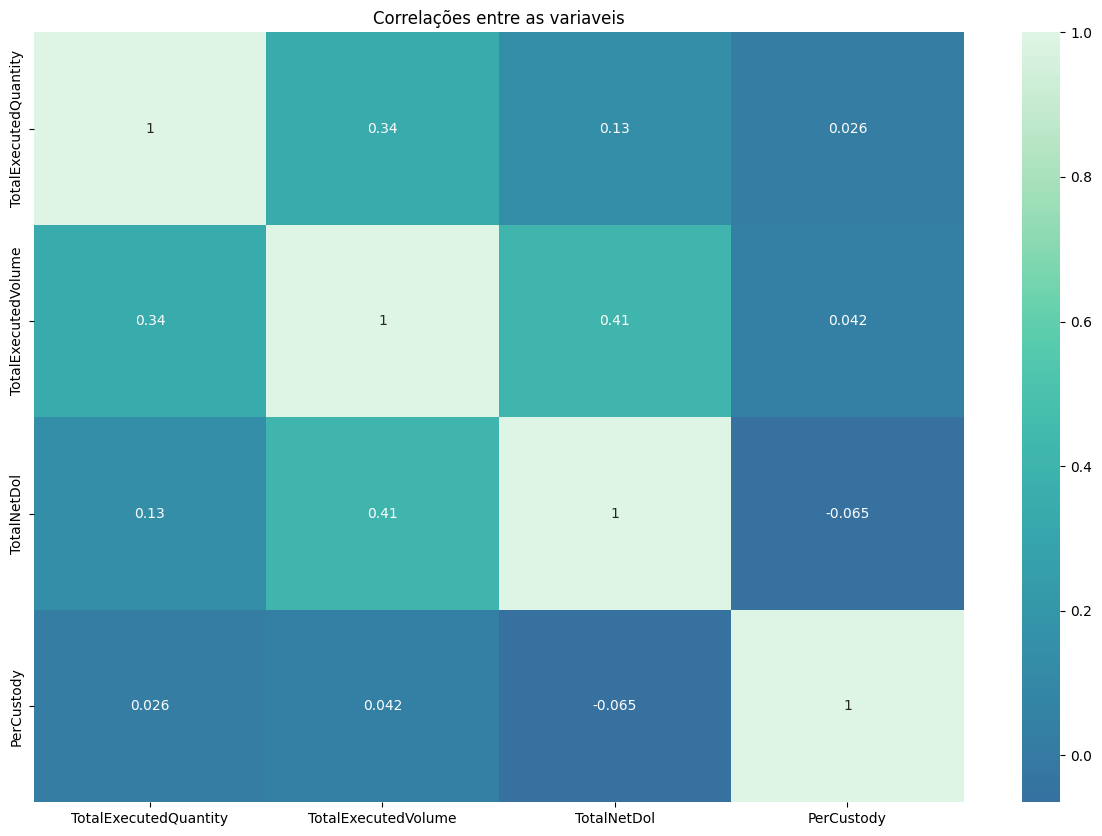

In [20]:
fig = plt.figure(figsize = (15,10))
sns.heatmap(df_dataset_ordens.corr(), center = 0, cmap = "mako", annot=True)
plt.title('Correlações entre as variaveis')
plt.show()

<Figure size 640x480 with 0 Axes>

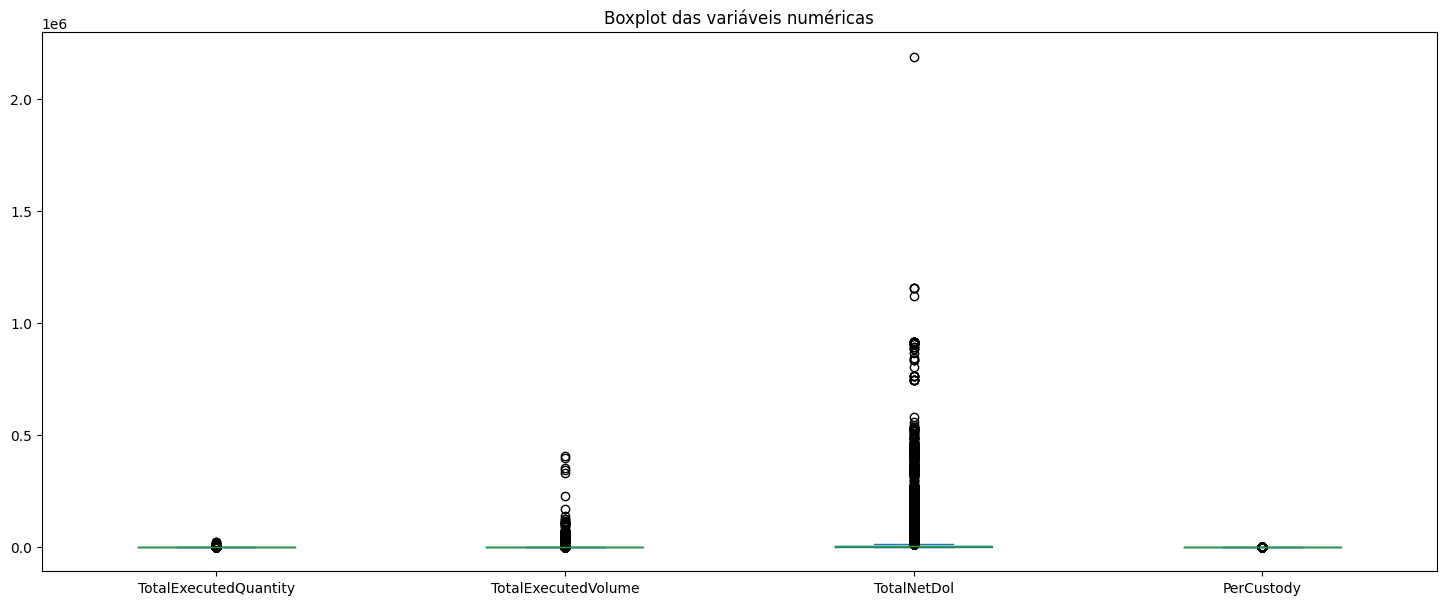

In [21]:
# Boxplot das colunas numéricas

fig = plt.figure()
numeric_cols = df_dataset_ordens.select_dtypes('number').columns

df_dataset_ordens[numeric_cols].plot.box(figsize=(18,7))
plt.title('Boxplot das variáveis numéricas')
plt.show()

<Figure size 640x480 with 0 Axes>

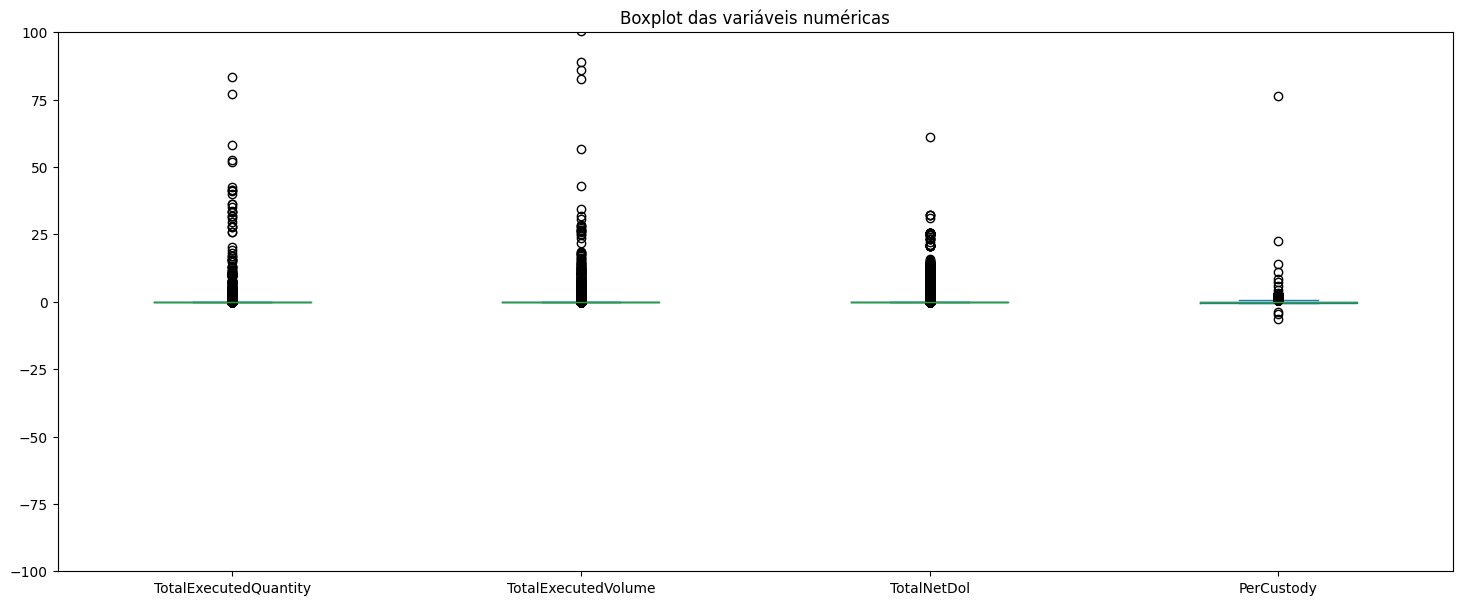

In [22]:
# Boxplot das colunas numéricas normalizadas

fig = plt.figure()
numeric_cols = df_dataset_ordens.select_dtypes('number').columns

df_dataset_ordens[numeric_cols].apply(scale).plot.box(figsize=(18,7))
plt.ylim(-100, 100)
plt.title('Boxplot das variáveis numéricas')
plt.show()

In [23]:
# Normalização dos dados

c
dfNorm.head()

,TotalExecutedQuantity,TotalExecutedVolume,TotalNetDol,PerCustody
0,-0.057467,-0.055360,-0.211621,1.991753
1,-0.038733,-0.051107,-0.194881,0.359204
2,-0.061110,-0.037882,-0.194881,0.516731
3,-0.038733,-0.058385,-0.194881,0.272524
4,-0.064175,-0.114188,-0.214268,-0.153797


## Outliers

In [24]:
# Quantidade de outliers do dataset

Outliers = []
Outliers.append(df_dataset_ordens[dfNorm['TotalExecutedQuantity'] > 3.5].count()[0])
Outliers.append(df_dataset_ordens[dfNorm['TotalExecutedVolume'] > 3].count()[0])
Outliers.append(df_dataset_ordens[dfNorm['PerCustody'] < -3.5].count()[0] + df_dataset_ordens[dfNorm['PerCustody'] > 3.5].count()[0])
Outliers.append(df_dataset_ordens[dfNorm['TotalNetDol'] > 3.5].count()[0])
percent = np.sum(Outliers)/df_dataset_ordens.shape[0]*100

print(f'{percent:.2f}% dos dados são outliers')

1.27% dos dados são outliers


In [25]:
# Exclusão dos outliers

df = df_dataset_ordens.copy()

df = df.drop(df[dfNorm['TotalExecutedQuantity'] > 3.5].index, axis = 0)
df = df.drop(df[dfNorm['TotalExecutedVolume'] > 3.5].index, axis = 0)
df = df.drop(df[dfNorm['PerCustody'] < -3.5].index, axis = 0)
df = df.drop(df[dfNorm['PerCustody'] > 3.5].index, axis = 0)
df = df.drop(df[dfNorm['TotalNetDol'] > 3.5].index, axis = 0)

/tmp/ipykernel_76901/2207481087.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.drop(df[dfNorm['TotalExecutedVolume'] > 3.5].index, axis = 0)
/tmp/ipykernel_76901/2207481087.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.drop(df[dfNorm['PerCustody'] < -3.5].index, axis = 0)
/tmp/ipykernel_76901/2207481087.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.drop(df[dfNorm['PerCustody'] > 3.5].index, axis = 0)
/tmp/ipykernel_76901/2207481087.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.drop(df[dfNorm['TotalNetDol'] > 3.5].index, axis = 0)


In [26]:
lista = ['TotalExecutedQuantity', 'TotalExecutedVolume', 'PerCustody', 'TotalNetDol']

[]

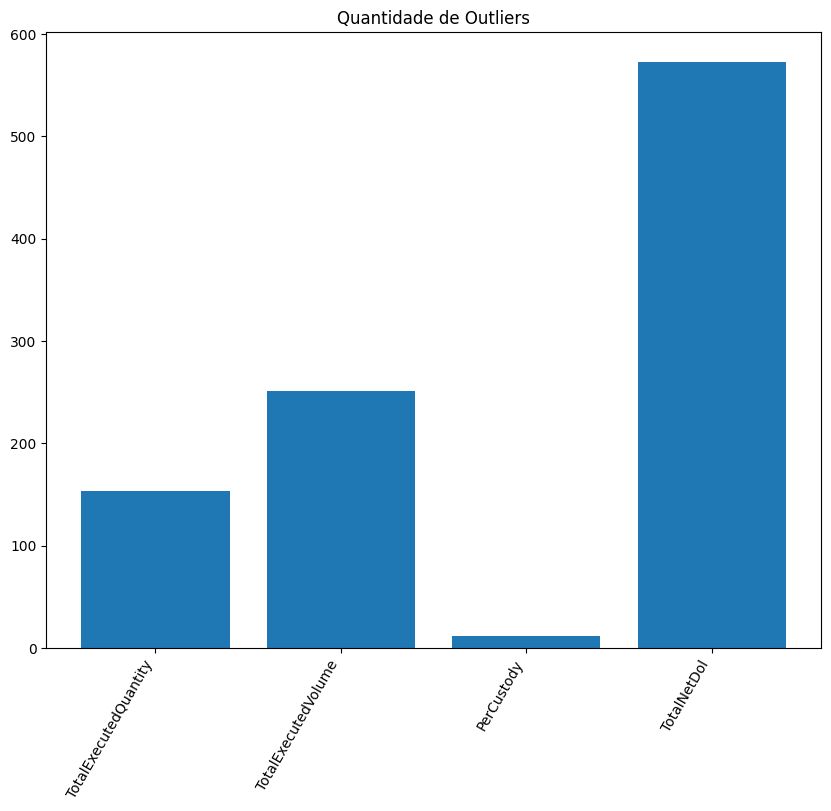

In [27]:
# Quantidade de Outliers por features

fig = plt.figure(figsize=(10, 8))
plt.bar(lista, Outliers)
plt.xticks(rotation=60, ha='right')
plt.title('Quantidade de Outliers')
plt.plot()

## Criação de novas features

### Frequência de compra por produtos

In [ ]:
# Frequencia de compra por produtos

NumProduto = pd.DataFrame(df.groupby('AccountID')['Symbol'].value_counts())
NumProduto = NumProduto.rename({'Symbol': 'FreqSymbol'}, axis = 1)
NumProduto = NumProduto.reset_index(level=['AccountID', 'Symbol'])

totalFreq = NumProduto.groupby('AccountID')[['FreqSymbol']].sum()
totalFreq = totalFreq.reset_index().rename({'FreqSymbol': 'TotalPeriodo'}, axis = 1)
totalFreq

NumProduto = NumProduto.merge(totalFreq, on = 'AccountID', how = 'left')
NumProduto['FrequenciaSymbol'] = NumProduto['FreqSymbol']/NumProduto['TotalPeriodo']
NumProduto = NumProduto.query('TotalPeriodo >= 3')
FreqIndustria = NumProduto[['AccountID', 'Symbol', 'FrequenciaSymbol']]
FreqIndustria

,AccountID,Symbol,FrequenciaSymbol
0,++YieSZGfZnQHRV5FF1JNg==,AAPL,0.250000
1,++YieSZGfZnQHRV5FF1JNg==,AMZN,0.250000
2,++YieSZGfZnQHRV5FF1JNg==,KO,0.250000
3,++YieSZGfZnQHRV5FF1JNg==,MCD,0.250000
4,++ygzT1S9emiLBX8doX9gw==,LQD,0.285714
...,...,...,...
39986,zzpu17wcTyeqk9kCFtWN6g==,ARKX,0.083333
39987,zzpu17wcTyeqk9kCFtWN6g==,AVB,0.083333
39988,zzpu17wcTyeqk9kCFtWN6g==,NOBL,0.083333
39989,zzpu17wcTyeqk9kCFtWN6g==,STAG,0.083333


In [ ]:
dfProduto = df.copy()
dfProduto = dfProduto.merge(FreqIndustria, on = ['AccountID', 'Symbol'], how = 'left')

In [ ]:
dfProduto = dfProduto.dropna()

In [ ]:
dfProduto

,Date,AccountID,BuySell,ProductCategory,Symbol,Industry,OrderId,Sector,TotalExecutedQuantity,TotalExecutedVolume,TotalNetDol,PerCustody,FrequenciaSymbol
0,2022-01-03,w8yfsMS4QUb7bCwI5HJDrw==,B,Stocks,AAPL,TelecommunicationsEquipment,mqhFlYOoXtIn3zlGcPmp+A==,ElectronicTechnology,1.40000,252.92,269.59,0.938165,0.333333
1,2022-01-03,W0EGzvROfn7ndaj+Kc8NVA==,B,ETF's,VNQI,InvestmentTrustsOrMutualFunds,IAm/NpNiQ0EjdfnKD2o6cg==,Miscellaneous,5.00000,269.75,865.71,0.311594,0.232558
2,2022-01-03,W0EGzvROfn7ndaj+Kc8NVA==,B,ETF's,VGT,InvestmentTrustsOrMutualFunds,L0YtOQc4BFV3hg2Do3yKIg==,Miscellaneous,0.70000,322.09,865.71,0.372053,0.255814
3,2022-01-03,W0EGzvROfn7ndaj+Kc8NVA==,B,Stocks,EPR,RealEstateInvestmentTrusts,HA3ssXMKNWEzTu//mmliqg==,Finance,5.00000,240.95,865.71,0.278326,0.279070
5,2022-01-03,UdedUK+wRijCwnupMh+H9A==,B,Stocks,AMZN,InternetRetail,B+jzwGnTVYxqNb7WgBN/3w==,RetailTrade,0.01600,54.36,170.19,0.319408,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76935,2022-01-10,u3PjR2c4C1+XQXO/SyRJNw==,B,ETF's,EUDG,InvestmentTrustsOrMutualFunds,bIQ/kxFrik9JJgjPgiKQfQ==,Miscellaneous,1.00000,33.49,494.17,0.067770,0.090909
76936,2022-01-06,YRcZ3U6Iut0yAyH6mSNrXw==,B,Stocks,BIT,InvestmentTrustsOrMutualFunds,QTlto4tvewcbGg8II4rbVg==,Miscellaneous,1.61585,29.02,380.50,0.076268,0.071429
76937,2022-01-05,L14gVc2TNMKaJOB0LI84Cw==,B,Stocks,NU,InformationTechnologyServices,okH3v38ER10Db85EbGKQog==,TechnologyServices,3.00000,28.65,111.99,0.255826,0.625000
76939,2022-01-03,9mPLzJU59jAig5TaJdswjA==,B,Stocks,RIVN,MotorVehicles,BEgkJzEaBvDc2aKqrk6xcg==,ConsumerDurables,0.20000,20.38,101.67,0.200452,0.200000


## Gráficos

In [ ]:
contColNames = lista.copy()

In [ ]:
ncols = 3 #quantas colunas que queremos que coloque os graficos
nrows = int(np.ceil(len(contColNames)/(1.0 * ncols))) #np.ceil arredonda para cima -- np.floor arredonda para baixo

[]

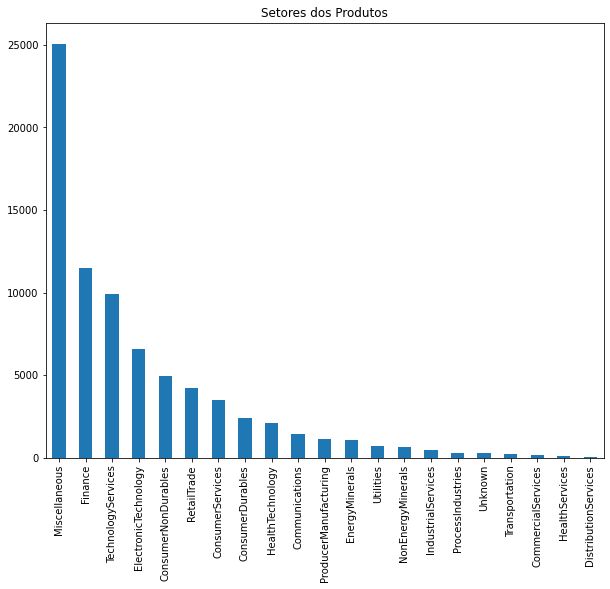

In [ ]:
# Número de transações por Setor
fig = plt.figure(figsize=(10, 8))
df.Sector.value_counts().plot(kind='bar')
plt.title('Setores dos Produtos')
plt.plot()

[]

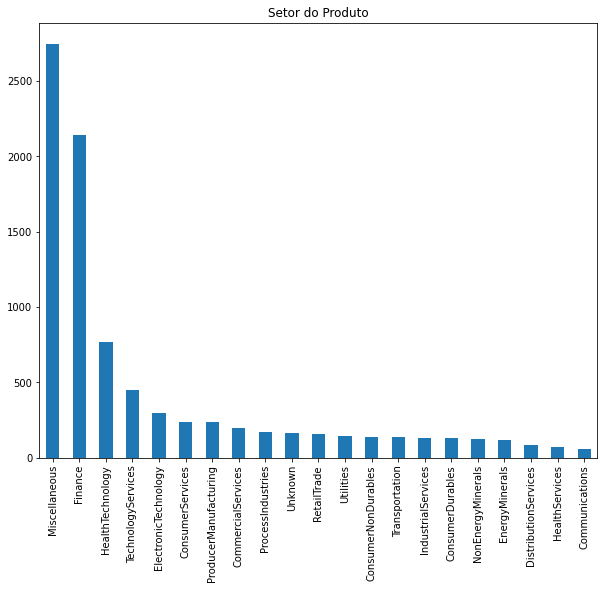

In [ ]:
# Número Setor no catálogo da Avenue
fig = plt.figure(figsize=(10, 8))
dfs['produtos'].Sector.value_counts().plot(kind='bar')
plt.title('Setor do Produto')
plt.plot()

[]

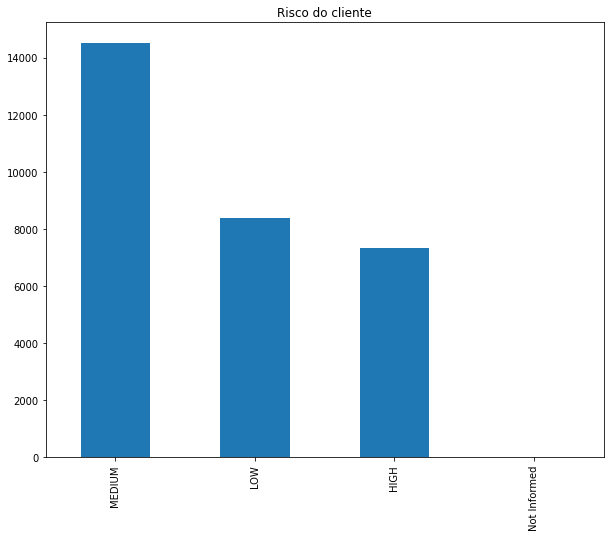

In [ ]:
# Perfil dos clientes
fig = plt.figure(figsize=(10, 8))
dfs['clientes'].RiskTolerance.value_counts().plot(kind='bar')
plt.title('Risco do cliente')
plt.plot()

[]

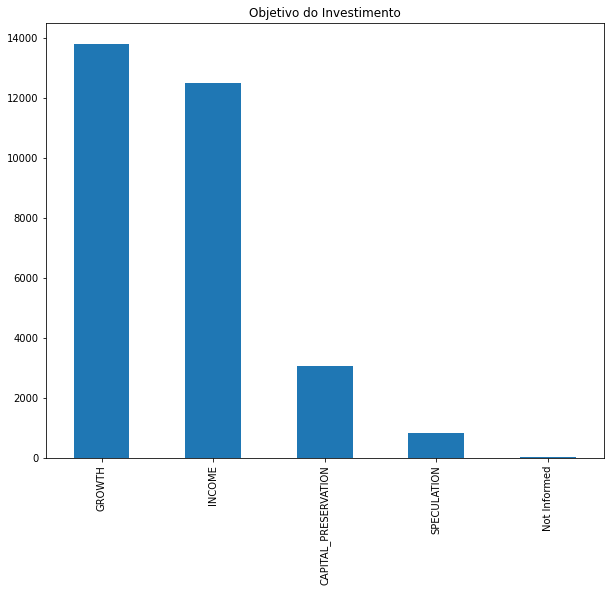

In [ ]:
#Perfil do cliente
fig = plt.figure(figsize=(10, 8))
dfs['clientes'].InvestmentObjective.value_counts().plot(kind='bar')
plt.title('Objetivo do Investimento')
plt.plot()

[]

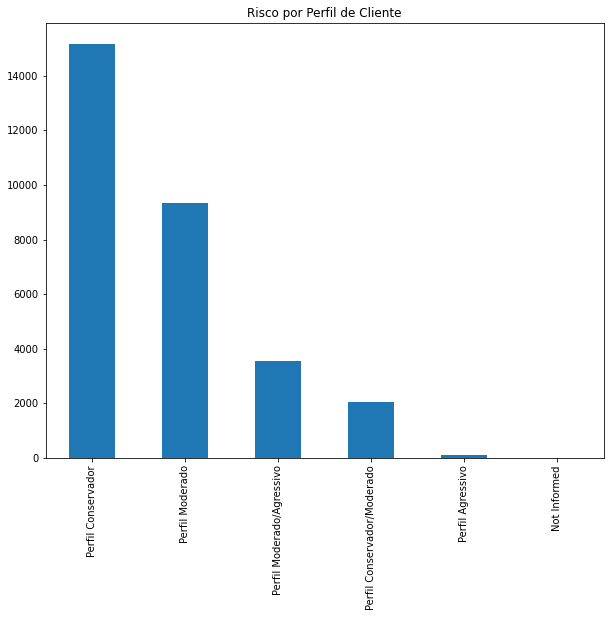

In [ ]:
#Risco do cliente
fig = plt.figure(figsize=(10, 8))
dfs['clientes'].AvenueRiskProfile.value_counts().plot(kind='bar')
plt.title('Risco por Perfil de Cliente')
plt.plot()

[]

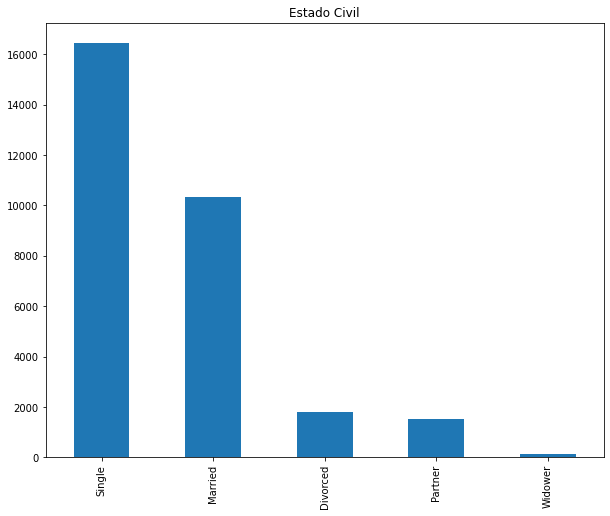

In [ ]:
# Estado Civil dos cliente
fig = plt.figure(figsize=(10, 8))
dfs['clientes'].MaritalStatus.value_counts().plot(kind='bar')
plt.title('Estado Civil')
plt.plot()

[]

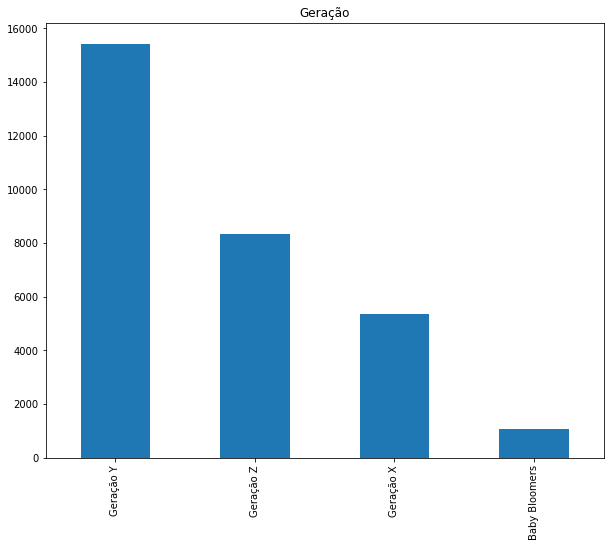

In [ ]:
# Geração dos clientes
fig = plt.figure(figsize=(10, 8))
dfs['clientes'].Geracao.value_counts().plot(kind='bar')
plt.title('Geração')
plt.plot()

[]

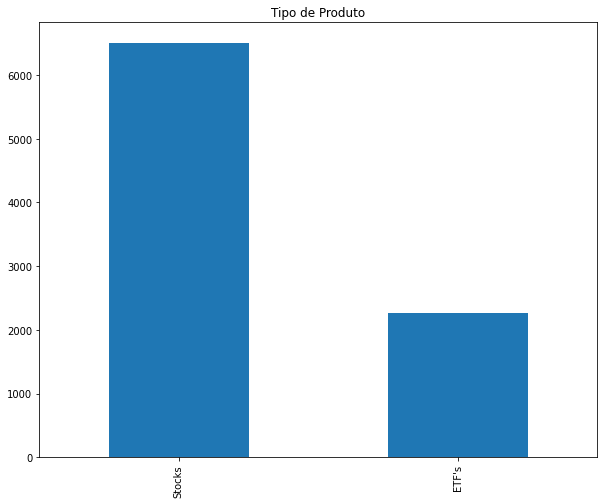

In [ ]:
# Ações ou ETFS na Avenue
fig = plt.figure(figsize=(10, 8))
dfs['produtos'].Product_N3.value_counts().plot(kind='bar')
plt.title('Tipo de Produto')
plt.plot()

[]

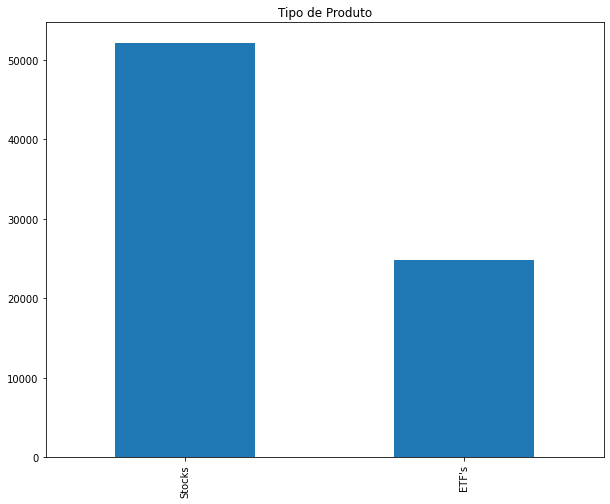

In [ ]:
# Ações ou ETFS nas transações
fig = plt.figure(figsize=(10, 8))
df['ProductCategory'].value_counts().plot(kind='bar')
plt.title('Tipo de Produto')
plt.plot()

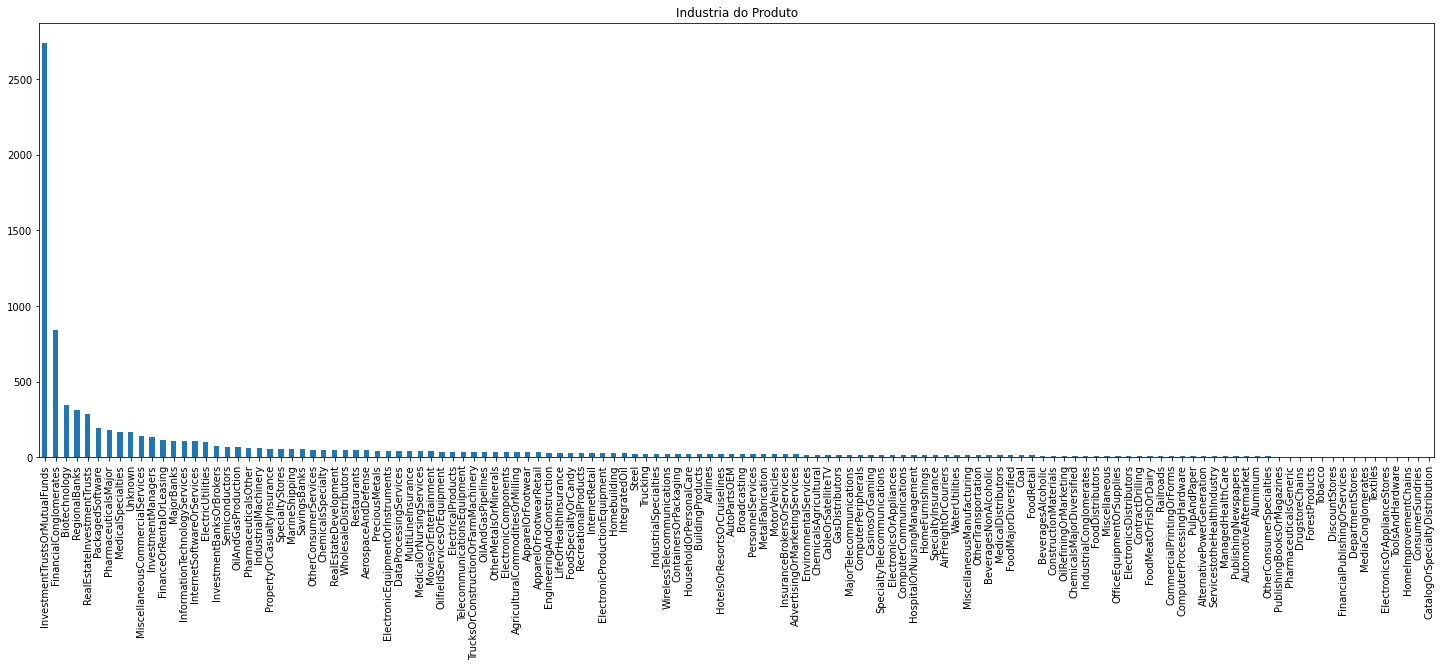

In [ ]:
fig = plt.figure(figsize=(25, 8))
dfs['produtos'].Industry.value_counts().plot(kind='bar')
plt.title('Industria do Produto')
plt.show()

# Modeling

### Modelo Top N Consumidos

**Top N consumidos**: os N itens mais consumidos pelos usuários no período

Será utilizado para usuários novos na plataforma, que não tem nenhum produto como seed

In [ ]:
df_ratings = dfProduto[['AccountID', 'Symbol', 'FrequenciaSymbol', 'Date']].rename({'AccountID': 'user_id', 'Symbol': 'item_id', 'FrequenciaSymbol': 'rating'}, axis = 1)
df_ratings

,user_id,item_id,rating,Date
0,w8yfsMS4QUb7bCwI5HJDrw==,AAPL,0.333333,2022-01-03
1,W0EGzvROfn7ndaj+Kc8NVA==,VNQI,0.232558,2022-01-03
2,W0EGzvROfn7ndaj+Kc8NVA==,VGT,0.255814,2022-01-03
3,W0EGzvROfn7ndaj+Kc8NVA==,EPR,0.279070,2022-01-03
5,UdedUK+wRijCwnupMh+H9A==,AMZN,0.200000,2022-01-03
...,...,...,...,...
76935,u3PjR2c4C1+XQXO/SyRJNw==,EUDG,0.090909,2022-01-10
76936,YRcZ3U6Iut0yAyH6mSNrXw==,BIT,0.071429,2022-01-06
76937,L14gVc2TNMKaJOB0LI84Cw==,NU,0.625000,2022-01-05
76939,9mPLzJU59jAig5TaJdswjA==,RIVN,0.200000,2022-01-03


In [ ]:
def recommend_top_n_consumptions(ratings:pd.DataFrame, n:int) -> pd.DataFrame:

    recommendations = (
        ratings
        .groupby('item_id')
        .count()['user_id']
        .reset_index()
        .rename({'user_id': 'score'}, axis=1)
        .sort_values(by='score', ascending=False)
    )

    return recommendations.head(n)

df_top_consumptions = recommend_top_n_consumptions(df_ratings, n=10)
df_top_consumptions

,item_id,score
6,AAPL,3982
111,AMZN,3001
2039,VOO,2902
888,GOOGL,2664
1138,KO,2507
2033,VNQ,2098
564,DIS,1976
1299,MSFT,1811
1894,TSLA,1807
1552,QQQ,1452


Para melhor avaliar o resultado da recomendação, podemos **anexar os metadados dos itens**

In [ ]:
df_produto

,Symbol,Product,Product_N1,Product_N2,Product_N3,Sector,Industry,Group
0,YI,13.93,Variable Income,Stocks and ETF's,Stocks,RetailTrade,DrugstoreChains,Services
1,IRBO,iShares Robotics and Artificial Intel Mltsctr...,Variable Income,Stocks and ETF's,ETF's,Miscellaneous,InvestmentTrustsOrMutualFunds,NaN
2,XM,Qualtrics International Inc.,Variable Income,Stocks and ETF's,Stocks,TechnologyServices,PackagedSoftware,Technology
3,STIP,0-5 Year TIPS Bond iShares,Variable Income,Stocks and ETF's,ETF's,Miscellaneous,InvestmentTrustsOrMutualFunds,NaN
4,VCVC,10X Capital Venture Acquisition Corp - Class A,Variable Income,Stocks and ETF's,Stocks,Finance,FinancialConglomerates,Financial
...,...,...,...,...,...,...,...,...
8762,ZWRKU,Z-Work Acquisition Corp - Units (1 Ord Class A...,Variable Income,Stocks and ETF's,Stocks,Finance,FinancialConglomerates,Financial
8763,ZY,Zymergen Inc.,Variable Income,Stocks and ETF's,Stocks,Unknown,Unknown,NaN
8764,ZYME,Zymeworks Inc,Variable Income,Stocks and ETF's,Stocks,HealthTechnology,Biotechnology,Healthcare
8765,ZYNE,"Zynerba Pharmaceuticals, Inc.",Variable Income,Stocks and ETF's,Stocks,HealthTechnology,PharmaceuticalsOther,Healthcare


In [ ]:
df_produto = df_produto.reset_index().rename({'Symbol': 'item_id'}, axis = 1).set_index('item_id')

In [ ]:
df_produto

,index,Product,Product_N1,Product_N2,Product_N3,Sector,Industry,Group
item_id,,,,,,,,
YI,0,13.93,Variable Income,Stocks and ETF's,Stocks,RetailTrade,DrugstoreChains,Services
IRBO,1,iShares Robotics and Artificial Intel Mltsctr...,Variable Income,Stocks and ETF's,ETF's,Miscellaneous,InvestmentTrustsOrMutualFunds,NaN
XM,2,Qualtrics International Inc.,Variable Income,Stocks and ETF's,Stocks,TechnologyServices,PackagedSoftware,Technology
STIP,3,0-5 Year TIPS Bond iShares,Variable Income,Stocks and ETF's,ETF's,Miscellaneous,InvestmentTrustsOrMutualFunds,NaN
VCVC,4,10X Capital Venture Acquisition Corp - Class A,Variable Income,Stocks and ETF's,Stocks,Finance,FinancialConglomerates,Financial
...,...,...,...,...,...,...,...,...
ZWRKU,8762,Z-Work Acquisition Corp - Units (1 Ord Class A...,Variable Income,Stocks and ETF's,Stocks,Finance,FinancialConglomerates,Financial
ZY,8763,Zymergen Inc.,Variable Income,Stocks and ETF's,Stocks,Unknown,Unknown,NaN
ZYME,8764,Zymeworks Inc,Variable Income,Stocks and ETF's,Stocks,HealthTechnology,Biotechnology,Healthcare


In [ ]:
df_top_consumptions.merge(df_produto, on='item_id', how='inner')

,item_id,score,index,Product,Product_N1,Product_N2,Product_N3,Sector,Industry,Group
0,AAPL,3982,585,"Apple, Inc.",Variable Income,Stocks and ETF's,Stocks,ElectronicTechnology,TelecommunicationsEquipment,Technology
1,AMZN,3001,398,Amazon.com Inc.,Variable Income,Stocks and ETF's,Stocks,RetailTrade,InternetRetail,Services
2,VOO,2902,7048,S&P 500 Vanguard ETF,Variable Income,Stocks and ETF's,ETF's,Miscellaneous,InvestmentTrustsOrMutualFunds,NaN
3,GOOGL,2664,357,Alphabet Inc. - Class A Shares,Variable Income,Stocks and ETF's,Stocks,TechnologyServices,InternetSoftwareOrServices,Technology
4,KO,2507,1807,"Coca-Cola Company, The",Variable Income,Stocks and ETF's,Stocks,ConsumerNonDurables,BeveragesNonAlcoholic,ConsumerGoods
5,VNQ,2098,6909,REIT Vanguard ETF,Variable Income,Stocks and ETF's,ETF's,Miscellaneous,InvestmentTrustsOrMutualFunds,NaN
6,DIS,1976,8456,"Walt Disney Company, The",Variable Income,Stocks and ETF's,Stocks,ConsumerServices,MediaConglomerates,Services
7,MSFT,1811,5539,Microsoft Corporation,Variable Income,Stocks and ETF's,Stocks,TechnologyServices,PackagedSoftware,Technology
8,TSLA,1807,7705,"Tesla, Inc.",Variable Income,Stocks and ETF's,Stocks,ConsumerDurables,MotorVehicles,ConsumerGoods
9,QQQ,1452,6553,PowerShares QQQ,Variable Income,Stocks and ETF's,ETF's,Miscellaneous,InvestmentTrustsOrMutualFunds,NaN


#### Resultados para métricas

Geração de resultados para avaliação das métricas

In [ ]:
train_size = 0.8
df_ratings.sort_values(by='Date', inplace=True)
df_train_set, df_valid_set= np.split(df_ratings, [int(train_size * df_ratings.shape[0])])

In [ ]:
recommendations = recommend_top_n_consumptions(df_ratings, n=20)
scores = [{'item_id': x['item_id'], 'score': x['score']} for _, x in recommendations.iterrows()]

In [ ]:

model_name = 'top'
df_predictions = df_valid_set
df_predictions['y_true'] = df_predictions.apply(lambda x: {'item_id': x['item_id'], 'rating': x['rating']}, axis=1)
df_predictions = df_predictions.groupby('user_id').agg({'y_true': list})
df_predictions['y_score'] = df_predictions.apply(lambda x: scores, axis=1)
df_predictions['model'] = model_name
df_predictions.reset_index(drop=False, inplace=True)
df_predictions.head()

,user_id,y_true,y_score,model
0,++ygzT1S9emiLBX8doX9gw==,"[{'item_id': 'VNQ', 'rating': 0.28571428571428...","[{'item_id': 'AAPL', 'score': 3982}, {'item_id...",top
1,+/1KCcbenzYbcAjZkwPcOg==,"[{'item_id': 'KO', 'rating': 1.0}, {'item_id':...","[{'item_id': 'AAPL', 'score': 3982}, {'item_id...",top
2,+/xeN/b1P7d+3IynWGX71g==,"[{'item_id': 'VNQI', 'rating': 0.0625}, {'item...","[{'item_id': 'AAPL', 'score': 3982}, {'item_id...",top
3,+0Jg7dJLgt+kBriq9CBmAg==,"[{'item_id': 'GOOGL', 'rating': 0.071428571428...","[{'item_id': 'AAPL', 'score': 3982}, {'item_id...",top
4,+1B0+GNRUpQ0y70J4jMlHQ==,"[{'item_id': 'IVV', 'rating': 0.125}, {'item_i...","[{'item_id': 'AAPL', 'score': 3982}, {'item_id...",top


In [ ]:
column_order = ['model', 'user_id', 'y_true', 'y_score']
df_predictions[column_order].to_parquet(f'valid_{model_name}.parquet', index=None)

### Modelo baseado em Co-visitation

Neste notebook iremos explorar a recomendação de itens a partir de co-visitação de itens. Este tipo de recomendação é utilizada em ofertas como "_Clientes que compraram X também compraram Y_".

Para criar o algoritmo utilizaremos a biblioteca [NetworkX](https://networkx.org/) que possibilita a criação, manipulação e estudos de estruturas em grafos.

Será utilizado para os usuários que já compraram na plataforma.

In [ ]:
df_covisitation = dfProduto[['AccountID', 'Symbol', 'FrequenciaSymbol']].rename({'AccountID': 'user_id', 'Symbol': 'item_id', 'FrequenciaSymbol': 'rating'}, axis = 1)
df_covisitation

,user_id,item_id,rating
0,w8yfsMS4QUb7bCwI5HJDrw==,AAPL,0.333333
1,W0EGzvROfn7ndaj+Kc8NVA==,VNQI,0.232558
2,W0EGzvROfn7ndaj+Kc8NVA==,VGT,0.255814
3,W0EGzvROfn7ndaj+Kc8NVA==,EPR,0.279070
5,UdedUK+wRijCwnupMh+H9A==,AMZN,0.200000
...,...,...,...
76935,u3PjR2c4C1+XQXO/SyRJNw==,EUDG,0.090909
76936,YRcZ3U6Iut0yAyH6mSNrXw==,BIT,0.071429
76937,L14gVc2TNMKaJOB0LI84Cw==,NU,0.625000
76939,9mPLzJU59jAig5TaJdswjA==,RIVN,0.200000


In [ ]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import networkx as nx

#### Criando o grafo de usuários e itens

Criaremos um grafo bipartido com as seguintes características:

- nós do tipo `item` e do tipo `usuário`
- Arestas entre um usuário e todos os itens que ele salvou

<img src="https://www.researchgate.net/publication/349424329/figure/fig3/AS:992764531585030@1613704917811/User-Item-bipartite-graph.jpg" alt="graph" width="200"/>

In [ ]:
G = nx.Graph()
G.add_nodes_from(df_covisitation['item_id'].unique(), node_type='item')
G.add_nodes_from(df_covisitation['user_id'].unique(), node_type='user')
G.add_weighted_edges_from(df_covisitation[['user_id', 'item_id', 'rating']].values) # [[no_1, no_2, peso]]

In [ ]:
G

In [ ]:
# Number of nodes
G.number_of_nodes()

7685

In [ ]:
# Number of edges
G.number_of_edges()

36818

#### Construindo a recomendação a partir do grafo

Uma vez criado o grafo, podemos buscar os vizinhos de um nó utilizando a função `graph.neighbors()`

In [ ]:
item_id = df_covisitation['item_id'][0]
neighbors = G.neighbors(item_id)
list(neighbors)[:5]

['w8yfsMS4QUb7bCwI5HJDrw==',
 'UdedUK+wRijCwnupMh+H9A==',
 '9apyK7suP9IpF6TOlxiwVA==',
 'DFFcBc492Y8m9wIkURAz4g==',
 'Np88U8egkop6GdEuSZ1Hnw==']

In [ ]:
user_id = df_covisitation['user_id'][0]
neighbors = G.neighbors(user_id)
list(neighbors)[:5]

['AAPL', 'XP', 'VNQI']

Note que os vizinhos de um nó do tipo `item` são os são todos os usuários que o salvaram enquanto os vizinhos de um nó do tipo `usuário` são todos os itens salvos por este usuário.

Desta forma, se quisermos a construção "_Quem viu X também viu Y_" podemos seguir o caminho:

1. Escolha do item-alvo
2. Obtenção dos vizinhos do item-alvo (usuários que o salvaram)
3. Vizinhos dos usuários que viram o item-alvo

In [ ]:
item_id = 'AAPL'
neighbors = G.neighbors(item_id)

neighbor_consumed_items = []
for user_id in neighbors:
    user_consumed_items = G.neighbors(user_id)
    neighbor_consumed_items += list(user_consumed_items)

print ('Quem viu {} também viu: {}'.format(item_id, ','.join(neighbor_consumed_items[:20])))

Quem viu AAPL também viu: AAPL,XP,VNQI,AMZN,AAPL,QQQ,IVV,GDX,AAPL,DIS,VOO,NVDA,SPY,VNQI,FB,AMZN,TSLA,BRK.B,AAPL,KO


Além disso, podemos fazer uma contagem dos itens que mais aparecem e utilizar este número como _score_ do item

In [ ]:
from collections import Counter

In [ ]:
consumed_items_count = Counter(neighbor_consumed_items)

Por fim, podemos juntar a lógica na função `recommend_neighbor_items()` que recebe como parâmetros:
- `G`: o grafo de itens e usuários
- `target_id`: o ID do item-alvo
- `n`: o número de itens a serem recomendados

**Nota**: uma validação inicial é feita para validar se o ID do nó é do tipo `item`

In [ ]:
def recommend_neighbor_items(G:nx.Graph, target_id, n=10):
    # Validando tipo do nó
    node_type = nx.get_node_attributes(G, 'node_type')[target_id]
    if node_type != 'item':
        raise ValueError('Node is not of item type.')

    # Analisando consumo dos usuários vizinhos
    neighbor_consumed_items = []
    for user_id in G.neighbors(target_id):
        user_consumed_items = G.neighbors(user_id)
        neighbor_consumed_items +=list(user_consumed_items)

    # Contabilizando itens consumidos pelos vizinhos
    consumed_items_count = Counter(neighbor_consumed_items)

    # Criando dataframe
    df_neighbors = pd.DataFrame(zip(consumed_items_count.keys(), consumed_items_count.values()))
    df_neighbors.columns = ['item_id', 'score']
    df_neighbors = df_neighbors.sort_values(by='score', ascending=False).set_index('item_id')
    return df_neighbors.head(n)

Note que o item-alvo é o que aparece em primeiro lugar na lista pois é a recomendação mais trivial ("_Quem viu X também viu X_"). No entanto, seu _score_ nos ajuda a analisar quantos vizinhos o item-alvo possui.

In [ ]:
item_id = 'MCD'     # McDonald's
# item_id = 'AMZN'  # Amazon
# item_id = 'SONY'   # SONY
# item_id = 'AAPL'  # Apple
# item_id = 'EGY'

nome_produto = df_produto.query('item_id == @item_id').reset_index()['Product'][0]
item_ids = recommend_neighbor_items(G, item_id, n=10).index
print(f'Quem comprou {item_id} - {nome_produto}, também comprou:\n')
df_produto[df_produto.index.isin(item_ids)]

Quem comprou MCD - McDonald's Corp., também comprou:



,index,Product,Product_N1,Product_N2,Product_N3,Sector,Industry,Group
item_id,,,,,,,,
MMM,29,3M Company,Variable Income,Stocks and ETF's,Stocks,ProducerManufacturing,IndustrialConglomerates,IndustrialGoods
GOOGL,357,Alphabet Inc. - Class A Shares,Variable Income,Stocks and ETF's,Stocks,TechnologyServices,InternetSoftwareOrServices,Technology
AMZN,398,Amazon.com Inc.,Variable Income,Stocks and ETF's,Stocks,RetailTrade,InternetRetail,Services
AAPL,585,"Apple, Inc.",Variable Income,Stocks and ETF's,Stocks,ElectronicTechnology,TelecommunicationsEquipment,Technology
KO,1807,"Coca-Cola Company, The",Variable Income,Stocks and ETF's,Stocks,ConsumerNonDurables,BeveragesNonAlcoholic,ConsumerGoods
JNJ,4883,Johnson & Johnson,Variable Income,Stocks and ETF's,Stocks,HealthTechnology,PharmaceuticalsMajor,Healthcare
MCD,5443,McDonald's Corp.,Variable Income,Stocks and ETF's,Stocks,ConsumerServices,Restaurants,Services
MSFT,5539,Microsoft Corporation,Variable Income,Stocks and ETF's,Stocks,TechnologyServices,PackagedSoftware,Technology
TSLA,7705,"Tesla, Inc.",Variable Income,Stocks and ETF's,Stocks,ConsumerDurables,MotorVehicles,ConsumerGoods


#### Divisão de Treino e Teste para validação

In [ ]:
def test_df(df_covisitation, user_list):
  df = pd.DataFrame()
  for user in user_list:
    df_seed = df_covisitation.query('user_id == @user').iloc[-1][['user_id', 'item_id', 'rating']]
    df = df.append(df_seed)
  return df

user_list = df_covisitation['user_id'].unique()
df_test_covisitation = test_df(df_covisitation, user_list)
df_test_covisitation

A saída de streaming foi truncada nas últimas 5000 linhas.
<ipython-input-116-8e97448bd136>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_seed)
<ipython-input-116-8e97448bd136>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_seed)
<ipython-input-116-8e97448bd136>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_seed)
<ipython-input-116-8e97448bd136>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_seed)
<ipython-input-116-8e97448bd136>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

,user_id,item_id,rating
60959,w8yfsMS4QUb7bCwI5HJDrw==,VNQI,0.333333
74123,W0EGzvROfn7ndaj+Kc8NVA==,VNQI,0.232558
4290,UdedUK+wRijCwnupMh+H9A==,GDX,0.200000
76940,9apyK7suP9IpF6TOlxiwVA==,NVDA,0.307692
493,+PpJmAGw5osAxeWARLzZCg==,SDIV,0.166667
...,...,...,...
76522,hW5o/+od0vNWe0CLxQQQdQ==,AAPL,0.333333
76612,y2Rj/Z9J97G1Pu7b/a5MYQ==,MPW,0.250000
76551,PGLhCf8VPE/ennjfLooKLg==,PGX,0.250000
76634,eDzXNiSkT+UrHpL2o8CrQw==,IVV,0.333333


In [ ]:
df_train_covisitation = df_covisitation.drop(df_test_covisitation.index ,axis = 0)

Seed é o item que será utilizado para fazer as recomendações (neste caso, é o último item que o usuário comprou, na base de treino)

In [ ]:
def item_seed(df_covisitation, user_list):
  df = pd.DataFrame()
  for user in user_list:
    df_seed = df_covisitation.query('user_id == @user').iloc[-1][['user_id', 'item_id', 'rating']]
    df = df.append(df_seed)
  return df

user_list = df_train_covisitation['user_id'].unique()
df_seed = item_seed(df_train_covisitation, user_list)
df_seed

A saída de streaming foi truncada nas últimas 5000 linhas.
<ipython-input-118-11cd78c50985>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_seed)
<ipython-input-118-11cd78c50985>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_seed)
<ipython-input-118-11cd78c50985>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_seed)
<ipython-input-118-11cd78c50985>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_seed)
<ipython-input-118-11cd78c50985>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

,user_id,item_id,rating
60958,w8yfsMS4QUb7bCwI5HJDrw==,XP,0.333333
74122,W0EGzvROfn7ndaj+Kc8NVA==,VGT,0.255814
1700,UdedUK+wRijCwnupMh+H9A==,IVV,0.200000
941,9apyK7suP9IpF6TOlxiwVA==,TSLA,0.153846
492,+PpJmAGw5osAxeWARLzZCg==,IVV,0.333333
...,...,...,...
76521,hW5o/+od0vNWe0CLxQQQdQ==,DIS,0.333333
76208,y2Rj/Z9J97G1Pu7b/a5MYQ==,WSR,0.250000
76549,PGLhCf8VPE/ennjfLooKLg==,LQD,0.250000
76633,eDzXNiSkT+UrHpL2o8CrQw==,QUAL,0.333333


In [ ]:
n_users = df_train_covisitation['user_id'].nunique()
n_items = df_train_covisitation['item_id'].nunique()
n_ratings = df_train_covisitation[['user_id', 'item_id']].drop_duplicates().shape[0]

print (f'#Usuários: {n_users}')
print (f'#Itens: {n_items}')
print (f'#Avaliações: {n_ratings}')

#Usuários: 5515
#Itens: 2111
#Avaliações: 34319


In [ ]:
G = nx.Graph()
G.add_nodes_from(df_train_covisitation['item_id'].unique(), node_type='item')
G.add_nodes_from(df_train_covisitation['user_id'].unique(), node_type='user')
G.add_weighted_edges_from(df_train_covisitation[['user_id', 'item_id', 'rating']].values) # [[no_1, no_2, peso]]

In [ ]:
item_id = 'AAPL'
neighbors = G.neighbors(item_id)

neighbor_consumed_items = []
for user_id in neighbors:
    user_consumed_items = G.neighbors(user_id)
    neighbor_consumed_items += list(user_consumed_items)

print ('Quem viu {} também viu: {}'.format(item_id, ','.join(neighbor_consumed_items[:20])))

Quem viu AAPL também viu: AAPL,XP,AMZN,AAPL,QQQ,IVV,AAPL,DIS,VOO,NVDA,SPY,VNQI,FB,AMZN,TSLA,BRK.B,AAPL,KO,NU,TSLA


In [ ]:
consumed_items_count = Counter(neighbor_consumed_items)

In [ ]:
def recommendation_seed(df_seed): 
  df_covisitation_recommendations = pd.DataFrame()
  for user in df_seed['user_id']:
    item_seed = df_seed.query('user_id == @user')['item_id'].values[0]
    item_ids = recommend_neighbor_items(G, item_seed, n=10).index
    df_temp = pd.DataFrame()
    df_temp['recommendation'] = item_ids
    df_temp['user_id'] = user
    df_temp['item_seed'] = item_seed
    df_covisitation_recommendations = df_covisitation_recommendations.append(df_temp)
  return df_covisitation_recommendations

df_covisitation_recommendations = recommendation_seed(df_seed)

A saída de streaming foi truncada nas últimas 5000 linhas.
<ipython-input-123-919f6c2b2779>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_covisitation_recommendations = df_covisitation_recommendations.append(df_temp)
<ipython-input-123-919f6c2b2779>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_covisitation_recommendations = df_covisitation_recommendations.append(df_temp)
<ipython-input-123-919f6c2b2779>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_covisitation_recommendations = df_covisitation_recommendations.append(df_temp)
<ipython-input-123-919f6c2b2779>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_covi

In [ ]:
df_covisitation_recommendations.head(20)

,recommendation,user_id,item_seed
0,XP,w8yfsMS4QUb7bCwI5HJDrw==,XP
1,AAPL,w8yfsMS4QUb7bCwI5HJDrw==,XP
2,AMZN,w8yfsMS4QUb7bCwI5HJDrw==,XP
3,GOOGL,w8yfsMS4QUb7bCwI5HJDrw==,XP
4,TSLA,w8yfsMS4QUb7bCwI5HJDrw==,XP
5,KO,w8yfsMS4QUb7bCwI5HJDrw==,XP
6,DIS,w8yfsMS4QUb7bCwI5HJDrw==,XP
7,MSFT,w8yfsMS4QUb7bCwI5HJDrw==,XP
8,FB,w8yfsMS4QUb7bCwI5HJDrw==,XP
9,BRK.B,w8yfsMS4QUb7bCwI5HJDrw==,XP


In [ ]:
df_covi_recommendation = df_covisitation_recommendations.groupby(['user_id', 'item_seed']).agg({'recommendation': list}).reset_index(drop=False)
df_covi_recommendation

,user_id,item_seed,recommendation
0,++YieSZGfZnQHRV5FF1JNg==,AMZN,"[AMZN, AAPL, GOOGL, DIS, MSFT, TSLA, KO, FB, X..."
1,++ygzT1S9emiLBX8doX9gw==,NOBL,"[NOBL, VNQ, VOO, QQQ, AAPL, GOOGL, DIS, AMZN, ..."
2,+/1KCcbenzYbcAjZkwPcOg==,KO,"[KO, AAPL, AMZN, GOOGL, DIS, MSFT, JNJ, TSLA, ..."
3,+/keI6erhuYMUHcZ1wRj7Q==,SRG,"[BRK.B, SRG, MBLY, MU, NFLX, COST, CAT, LIT, R..."
4,+/xeN/b1P7d+3IynWGX71g==,VNQ,"[VNQ, VOO, AAPL, QQQ, AMZN, KO, DIS, GOOGL, VN..."
...,...,...,...
5510,zyM+Rq83uJ2jqmbHjf7Odw==,AAPL,"[AAPL, AMZN, GOOGL, KO, MSFT, DIS, TSLA, FB, V..."
5511,zyerqNUfQI0zE7sUsGBqnQ==,AAPL,"[AAPL, AMZN, GOOGL, KO, MSFT, DIS, TSLA, FB, V..."
5512,zyfXUiv0w3F4b8BNm/MdmQ==,DIS,"[DIS, AAPL, AMZN, GOOGL, KO, MSFT, TSLA, FB, V..."
5513,zzA0Y+6Jx5k7XRpajfPG1g==,VNQ,"[VNQ, VOO, AAPL, QQQ, AMZN, KO, DIS, GOOGL, VN..."


In [ ]:
df_covisitation_recommendation = df_covi_recommendation.merge(df_test_covisitation[['user_id', 'item_id']], on = 'user_id', how = 'left')
df_covisitation_recommendation

,user_id,item_seed,recommendation,item_id
0,++YieSZGfZnQHRV5FF1JNg==,AMZN,"[AMZN, AAPL, GOOGL, DIS, MSFT, TSLA, KO, FB, X...",AAPL
1,++ygzT1S9emiLBX8doX9gw==,NOBL,"[NOBL, VNQ, VOO, QQQ, AAPL, GOOGL, DIS, AMZN, ...",VNQ
2,+/1KCcbenzYbcAjZkwPcOg==,KO,"[KO, AAPL, AMZN, GOOGL, DIS, MSFT, JNJ, TSLA, ...",KO
3,+/keI6erhuYMUHcZ1wRj7Q==,SRG,"[BRK.B, SRG, MBLY, MU, NFLX, COST, CAT, LIT, R...",BABA
4,+/xeN/b1P7d+3IynWGX71g==,VNQ,"[VNQ, VOO, AAPL, QQQ, AMZN, KO, DIS, GOOGL, VN...",PG
...,...,...,...,...
5510,zyM+Rq83uJ2jqmbHjf7Odw==,AAPL,"[AAPL, AMZN, GOOGL, KO, MSFT, DIS, TSLA, FB, V...",AMZN
5511,zyerqNUfQI0zE7sUsGBqnQ==,AAPL,"[AAPL, AMZN, GOOGL, KO, MSFT, DIS, TSLA, FB, V...",DIS
5512,zyfXUiv0w3F4b8BNm/MdmQ==,DIS,"[DIS, AAPL, AMZN, GOOGL, KO, MSFT, TSLA, FB, V...",XP
5513,zzA0Y+6Jx5k7XRpajfPG1g==,VNQ,"[VNQ, VOO, AAPL, QQQ, AMZN, KO, DIS, GOOGL, VN...",KO


In [ ]:
explode = df_covisitation_recommendation.explode('recommendation').reset_index(drop = True)
explode

,user_id,item_seed,recommendation,item_id
0,++YieSZGfZnQHRV5FF1JNg==,AMZN,AMZN,AAPL
1,++YieSZGfZnQHRV5FF1JNg==,AMZN,AAPL,AAPL
2,++YieSZGfZnQHRV5FF1JNg==,AMZN,GOOGL,AAPL
3,++YieSZGfZnQHRV5FF1JNg==,AMZN,DIS,AAPL
4,++YieSZGfZnQHRV5FF1JNg==,AMZN,MSFT,AAPL
...,...,...,...,...
54583,zzpu17wcTyeqk9kCFtWN6g==,VZ,DIS,AVB
54584,zzpu17wcTyeqk9kCFtWN6g==,VZ,MSFT,AVB
54585,zzpu17wcTyeqk9kCFtWN6g==,VZ,FB,AVB
54586,zzpu17wcTyeqk9kCFtWN6g==,VZ,JNJ,AVB


In [ ]:
explode['true'] = 0
for index in explode.index:
  if explode['recommendation'][index] == explode['item_id'][index]:
    explode['true'][index] = 1

<ipython-input-128-a3675a1d8e7a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  explode['true'][index] = 1


In [ ]:
df_covisitation_recommendation = explode.groupby(['user_id', 'item_seed', 'item_id']).agg({'recommendation': list, 'true': sum}).reset_index(drop=False)
df_covisitation_recommendation

,user_id,item_seed,item_id,recommendation,true
0,++YieSZGfZnQHRV5FF1JNg==,AMZN,AAPL,"[AMZN, AAPL, GOOGL, DIS, MSFT, TSLA, KO, FB, X...",1
1,++ygzT1S9emiLBX8doX9gw==,NOBL,VNQ,"[NOBL, VNQ, VOO, QQQ, AAPL, GOOGL, DIS, AMZN, ...",1
2,+/1KCcbenzYbcAjZkwPcOg==,KO,KO,"[KO, AAPL, AMZN, GOOGL, DIS, MSFT, JNJ, TSLA, ...",1
3,+/keI6erhuYMUHcZ1wRj7Q==,SRG,BABA,"[BRK.B, SRG, MBLY, MU, NFLX, COST, CAT, LIT, R...",0
4,+/xeN/b1P7d+3IynWGX71g==,VNQ,PG,"[VNQ, VOO, AAPL, QQQ, AMZN, KO, DIS, GOOGL, VN...",0
...,...,...,...,...,...
5510,zyM+Rq83uJ2jqmbHjf7Odw==,AAPL,AMZN,"[AAPL, AMZN, GOOGL, KO, MSFT, DIS, TSLA, FB, V...",1
5511,zyerqNUfQI0zE7sUsGBqnQ==,AAPL,DIS,"[AAPL, AMZN, GOOGL, KO, MSFT, DIS, TSLA, FB, V...",1
5512,zyfXUiv0w3F4b8BNm/MdmQ==,DIS,XP,"[DIS, AAPL, AMZN, GOOGL, KO, MSFT, TSLA, FB, V...",0
5513,zzA0Y+6Jx5k7XRpajfPG1g==,VNQ,KO,"[VNQ, VOO, AAPL, QQQ, AMZN, KO, DIS, GOOGL, VN...",1


#### Métricas para o modelo

In [ ]:
# Assertividade
assertividade = df_covisitation_recommendation['true'].sum()/df_covisitation_recommendation['true'].count()
print(f'A Assertividade do modelo é de {assertividade*100:.2f} %')

A Assertividade do modelo é de 54.74 %


In [ ]:
# Cobertura
cobertura = pd.DataFrame(explode['recommendation'].unique()).count()[0]/df_produto.count()[0]
print(f'A Cobertura do modelo é de {cobertura*100:.2f} % do catálogo')

A Cobertura do modelo é de 13.25 % do catálogo


In [ ]:
df_produto.count()[0]

8767

#### Comparação com a assertividade do modelo TOP N

In [ ]:
df_top_consumptions

,item_id,score
6,AAPL,3982
111,AMZN,3001
2039,VOO,2902
888,GOOGL,2664
1138,KO,2507
2033,VNQ,2098
564,DIS,1976
1299,MSFT,1811
1894,TSLA,1807
1552,QQQ,1452


In [ ]:
def recommendation_top(df_seed): 
  df_top_recommendations = pd.DataFrame()
  for user in df_seed['user_id']:
    item_ids = df_top_consumptions['item_id']
    df_temp = pd.DataFrame()
    df_temp['recommendation'] = item_ids
    df_temp['user_id'] = user
    df_top_recommendations = df_top_recommendations.append(df_temp)
  return df_top_recommendations

In [ ]:
df_top_recommendations = recommendation_top(df_seed)
df_top_recommendations

A saída de streaming foi truncada nas últimas 5000 linhas.
<ipython-input-134-e6a7fcdc3742>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_top_recommendations = df_top_recommendations.append(df_temp)
<ipython-input-134-e6a7fcdc3742>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_top_recommendations = df_top_recommendations.append(df_temp)
<ipython-input-134-e6a7fcdc3742>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_top_recommendations = df_top_recommendations.append(df_temp)
<ipython-input-134-e6a7fcdc3742>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_top_recommendations = df_top_recommendations.append(df_temp)
<

,recommendation,user_id
6,AAPL,w8yfsMS4QUb7bCwI5HJDrw==
111,AMZN,w8yfsMS4QUb7bCwI5HJDrw==
2039,VOO,w8yfsMS4QUb7bCwI5HJDrw==
888,GOOGL,w8yfsMS4QUb7bCwI5HJDrw==
1138,KO,w8yfsMS4QUb7bCwI5HJDrw==
...,...,...
2033,VNQ,qKf14+KGCt2FFBEPOcHi1g==
564,DIS,qKf14+KGCt2FFBEPOcHi1g==
1299,MSFT,qKf14+KGCt2FFBEPOcHi1g==
1894,TSLA,qKf14+KGCt2FFBEPOcHi1g==


In [ ]:
df_top_recommendation = df_top_recommendations.groupby('user_id').agg({'recommendation': list}).reset_index(drop=False)
df_top_recommendation

,user_id,recommendation
0,++YieSZGfZnQHRV5FF1JNg==,"[AAPL, AMZN, VOO, GOOGL, KO, VNQ, DIS, MSFT, T..."
1,++ygzT1S9emiLBX8doX9gw==,"[AAPL, AMZN, VOO, GOOGL, KO, VNQ, DIS, MSFT, T..."
2,+/1KCcbenzYbcAjZkwPcOg==,"[AAPL, AMZN, VOO, GOOGL, KO, VNQ, DIS, MSFT, T..."
3,+/keI6erhuYMUHcZ1wRj7Q==,"[AAPL, AMZN, VOO, GOOGL, KO, VNQ, DIS, MSFT, T..."
4,+/xeN/b1P7d+3IynWGX71g==,"[AAPL, AMZN, VOO, GOOGL, KO, VNQ, DIS, MSFT, T..."
...,...,...
5510,zyM+Rq83uJ2jqmbHjf7Odw==,"[AAPL, AMZN, VOO, GOOGL, KO, VNQ, DIS, MSFT, T..."
5511,zyerqNUfQI0zE7sUsGBqnQ==,"[AAPL, AMZN, VOO, GOOGL, KO, VNQ, DIS, MSFT, T..."
5512,zyfXUiv0w3F4b8BNm/MdmQ==,"[AAPL, AMZN, VOO, GOOGL, KO, VNQ, DIS, MSFT, T..."
5513,zzA0Y+6Jx5k7XRpajfPG1g==,"[AAPL, AMZN, VOO, GOOGL, KO, VNQ, DIS, MSFT, T..."


In [ ]:
df_top_recommendation = df_top_recommendation.merge(df_test_covisitation[['user_id', 'item_id']], on = 'user_id', how = 'left')
df_top_recommendation

,user_id,recommendation,item_id
0,++YieSZGfZnQHRV5FF1JNg==,"[AAPL, AMZN, VOO, GOOGL, KO, VNQ, DIS, MSFT, T...",AAPL
1,++ygzT1S9emiLBX8doX9gw==,"[AAPL, AMZN, VOO, GOOGL, KO, VNQ, DIS, MSFT, T...",VNQ
2,+/1KCcbenzYbcAjZkwPcOg==,"[AAPL, AMZN, VOO, GOOGL, KO, VNQ, DIS, MSFT, T...",KO
3,+/keI6erhuYMUHcZ1wRj7Q==,"[AAPL, AMZN, VOO, GOOGL, KO, VNQ, DIS, MSFT, T...",BABA
4,+/xeN/b1P7d+3IynWGX71g==,"[AAPL, AMZN, VOO, GOOGL, KO, VNQ, DIS, MSFT, T...",PG
...,...,...,...
5510,zyM+Rq83uJ2jqmbHjf7Odw==,"[AAPL, AMZN, VOO, GOOGL, KO, VNQ, DIS, MSFT, T...",AMZN
5511,zyerqNUfQI0zE7sUsGBqnQ==,"[AAPL, AMZN, VOO, GOOGL, KO, VNQ, DIS, MSFT, T...",DIS
5512,zyfXUiv0w3F4b8BNm/MdmQ==,"[AAPL, AMZN, VOO, GOOGL, KO, VNQ, DIS, MSFT, T...",XP
5513,zzA0Y+6Jx5k7XRpajfPG1g==,"[AAPL, AMZN, VOO, GOOGL, KO, VNQ, DIS, MSFT, T...",KO


In [ ]:
explode = df_top_recommendation.explode('recommendation').reset_index(drop = True)
explode

,user_id,recommendation,item_id
0,++YieSZGfZnQHRV5FF1JNg==,AAPL,AAPL
1,++YieSZGfZnQHRV5FF1JNg==,AMZN,AAPL
2,++YieSZGfZnQHRV5FF1JNg==,VOO,AAPL
3,++YieSZGfZnQHRV5FF1JNg==,GOOGL,AAPL
4,++YieSZGfZnQHRV5FF1JNg==,KO,AAPL
...,...,...,...
55145,zzpu17wcTyeqk9kCFtWN6g==,VNQ,AVB
55146,zzpu17wcTyeqk9kCFtWN6g==,DIS,AVB
55147,zzpu17wcTyeqk9kCFtWN6g==,MSFT,AVB
55148,zzpu17wcTyeqk9kCFtWN6g==,TSLA,AVB


In [ ]:
explode['true'] = 0
for index in explode.index:
  if explode['recommendation'][index] == explode['item_id'][index]:
    explode['true'][index] = 1

<ipython-input-139-a3675a1d8e7a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  explode['true'][index] = 1


In [ ]:
df_top_recommendation = explode.groupby(['user_id', 'item_id']).agg({'recommendation': list, 'true': sum}).reset_index(drop=False)
df_top_recommendation

,user_id,item_id,recommendation,true
0,++YieSZGfZnQHRV5FF1JNg==,AAPL,"[AAPL, AMZN, VOO, GOOGL, KO, VNQ, DIS, MSFT, T...",1
1,++ygzT1S9emiLBX8doX9gw==,VNQ,"[AAPL, AMZN, VOO, GOOGL, KO, VNQ, DIS, MSFT, T...",1
2,+/1KCcbenzYbcAjZkwPcOg==,KO,"[AAPL, AMZN, VOO, GOOGL, KO, VNQ, DIS, MSFT, T...",1
3,+/keI6erhuYMUHcZ1wRj7Q==,BABA,"[AAPL, AMZN, VOO, GOOGL, KO, VNQ, DIS, MSFT, T...",0
4,+/xeN/b1P7d+3IynWGX71g==,PG,"[AAPL, AMZN, VOO, GOOGL, KO, VNQ, DIS, MSFT, T...",0
...,...,...,...,...
5510,zyM+Rq83uJ2jqmbHjf7Odw==,AMZN,"[AAPL, AMZN, VOO, GOOGL, KO, VNQ, DIS, MSFT, T...",1
5511,zyerqNUfQI0zE7sUsGBqnQ==,DIS,"[AAPL, AMZN, VOO, GOOGL, KO, VNQ, DIS, MSFT, T...",1
5512,zyfXUiv0w3F4b8BNm/MdmQ==,XP,"[AAPL, AMZN, VOO, GOOGL, KO, VNQ, DIS, MSFT, T...",0
5513,zzA0Y+6Jx5k7XRpajfPG1g==,KO,"[AAPL, AMZN, VOO, GOOGL, KO, VNQ, DIS, MSFT, T...",1


In [ ]:
# Assertividade TOP
assertividade_top = df_top_recommendation['true'].sum()/df_top_recommendation['true'].count()
print(f'A Assertividade do modelo TOP N é de {assertividade_top*100:.2f} %')

A Assertividade do modelo TOP N é de 36.55 %


In [ ]:
# Cobertura TOP
cobertura_top = pd.DataFrame(explode['recommendation'].unique()).count()[0]/df_produto.count()[0]
print(f'A Cobertura do modelo TOP N é de {cobertura_top*100:.2f} % do catálogo')

A Cobertura do modelo TOP N é de 0.11 % do catálogo
